In [2]:
import keras
import tensorflow as tf
import numpy as np
from PIL import Image

Using TensorFlow backend.


(504, 288, 352, 3)
(504,)


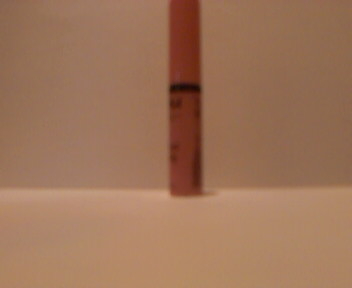

In [3]:
# Note: data isn't in the repository

# loading data
data = np.load("data/x_images.npy")
labels = np.load("data/y_images.npy")

# shuffling data
indices = np.random.choice(np.arange(len(data)), size=len(data), replace=False)
data = data[indices]
labels = labels[indices]

# encode labels to one-hot
num_classes = len(set((labels)))
labels_c = keras.utils.to_categorical(labels, num_classes)

print(data.shape)
print(labels.shape)
Image.fromarray(np.array(data[0], dtype=np.uint8))

In [4]:
# load a pretrained model (without the top dense layers)

base_model = keras.applications.DenseNet121(include_top=False, weights='imagenet', input_tensor=None, input_shape=[288,352,3], pooling=None, classes=num_classes)

In [5]:
# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False


In [6]:
# https://keras.io/applications/
# add layers to the pretrained network
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = keras.layers.Dense(116, activation='relu')(x)
#x = keras.layers.Dense(512, activation='relu')(x)
x = keras.layers.Dropout(0.5)(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = keras.models.Model(inputs=base_model.input, outputs=predictions)

In [6]:
model.load_weights("")

In [7]:
filepath="data/model/116/weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=5e-5),
              metrics=['acc'])
# Train the model
history = model.fit(x=data,y=labels_c,batch_size=200,epochs=500,callbacks=callbacks_list,validation_split=0.20)
model.predict(data)

Train on 403 samples, validate on 101 samples
Epoch 1/500
403/403 [==============================] - 5s 12ms/step - loss: 0.1290 - acc: 0.9801 - val_loss: 5.7983 - val_acc: 0.4455

Epoch 00001: val_acc did not improve from 0.46535
Epoch 2/500
403/403 [==============================] - 2s 6ms/step - loss: 0.1291 - acc: 0.9677 - val_loss: 5.8512 - val_acc: 0.4455

Epoch 00002: val_acc did not improve from 0.46535
Epoch 3/500
403/403 [==============================] - 2s 6ms/step - loss: 0.1527 - acc: 0.9603 - val_loss: 5.8525 - val_acc: 0.4455

Epoch 00003: val_acc did not improve from 0.46535
Epoch 4/500
403/403 [==============================] - 2s 6ms/step - loss: 0.1369 - acc: 0.9752 - val_loss: 5.8774 - val_acc: 0.4455

Epoch 00004: val_acc did not improve from 0.46535
Epoch 5/500
403/403 [==============================] - 2s 6ms/step - loss: 0.1225 - acc: 0.9851 - val_loss: 5.9231 - val_acc: 0.4554

Epoch 00005: val_acc did not improve from 0.46535
Epoch 6/500
403/403 [============

KeyboardInterrupt: 

102
6
49
89
0
***
1
0


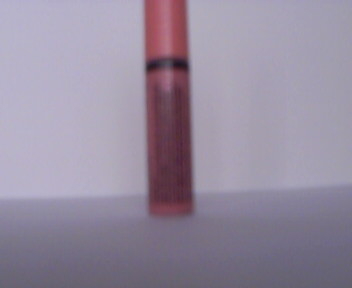

In [32]:
predictions = np.argmax(model.predict(data),1)
false_l = list(predictions[predictions != labels])
true_l = list(labels[predictions != labels])
data_e = list(data[predictions != labels])
#for i in range(len(false_l)):
    #print("%d:%s"%(true_l[i],false_l[i]))
    
#print(false_l.count(0))
#print(len(true_l))
print(true_l.count(0))
print(true_l.count(1))
print(true_l.count(2))
print(true_l.count(3))
print(true_l.count(4))

print("***")

print(true_l[0])
print(false_l[0])
Image.fromarray(np.array(data_e[0], dtype=np.uint8))

In [8]:
model.load_weights("data/model/116/weights-improvement-01-0.55.hdf5")

In [14]:
for layer in model.layers[:424]:
   layer.trainable = False
for layer in model.layers[424:]:
   layer.trainable = True

In [15]:
filepath="data/model/116/weights-improvement2-{epoch:02d}-{val_acc:.2f}-116.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=1e-5),
              metrics=['acc'])
# Train the model
history = model.fit(x=data,y=labels_c,batch_size=50,epochs=200,callbacks=callbacks_list,validation_split=0.25)


Train on 378 samples, validate on 126 samples
Epoch 1/200
378/378 [==============================] - 5s 13ms/step - loss: 0.1800 - acc: 0.9577 - val_loss: 5.3745 - val_acc: 0.5317

Epoch 00001: val_acc did not improve from 0.53175
Epoch 2/200
378/378 [==============================] - 3s 7ms/step - loss: 0.1865 - acc: 0.9497 - val_loss: 5.3838 - val_acc: 0.5317

Epoch 00002: val_acc did not improve from 0.53175
Epoch 3/200
378/378 [==============================] - 3s 7ms/step - loss: 0.1844 - acc: 0.9577 - val_loss: 5.3922 - val_acc: 0.5238

Epoch 00003: val_acc did not improve from 0.53175
Epoch 4/200
378/378 [==============================] - 3s 7ms/step - loss: 0.1985 - acc: 0.9577 - val_loss: 5.4024 - val_acc: 0.5238

Epoch 00004: val_acc did not improve from 0.53175
Epoch 5/200
378/378 [==============================] - 3s 7ms/step - loss: 0.1605 - acc: 0.9735 - val_loss: 5.4092 - val_acc: 0.5238

Epoch 00005: val_acc did not improve from 0.53175
Epoch 6/200
378/378 [============

KeyboardInterrupt: 

In [7]:
val_acc = str(int(history.history["val_acc"][-1]*100))
val_loss = str(int(history.history["val_loss"][-1]*10))
filename = '_val_acc_'+val_acc+"_val_loss_"+val_loss
# Save the weights
model.save_weights('data/model/weights_'+filename+'.h5')

# Save the model architecture
with open('data/model/model_ar_'+filename+'.json', 'w') as f:
    f.write(model.to_json())